<a href="https://colab.research.google.com/github/c-e-leiva/AprendizajeAutomatico/blob/main/Clustering_LeivaCarlosEzequiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING** 🤖📊
## **CLUSTERING - DESAFÍO**

### **CONSIGNAS:** 📌

1) Deberá elegir un dataset no trabajado en clases para aplicar lo aprendido en aprendizaje no supervisado: aplicar clustering y/o reducción de dimensionalidad.

2) Elija un dataset para tarea de clasificación del siguiente enlace. [aquí](https://archive.ics.uci.edu/datasets?Task=Clustering&FeatureTypes=Numerical&skip=0&take=10&sort=desc&orderBy=NumHits&search=)

3) No podrá repetir o utilizar el mismo dataset que algún otro estudiante. Para ello debe postear en este grupo cuál es su dataset elegido. Una vez elegido no podrá cambiarlo.

4) Debe postear aquí como entrega el enlace a su notebook colab público, también almacenado en su github.

5) En su notebook debe tener como mínimo los siguientes apartados:

5.1 Presentación y descripción del dataset.

5.2 Pre-procesamiento del dataset

5.3 Explicación del objetivo (por qué aplicará aprendizaje por refuerzo)

5.4 Elección de modelos a utilizar.

5.5 Entrenamiento de los modelos (mínimo dos)

5.6 Resultados obtenidos y su análisis

5.7 Conclusiones
------------------

# **Descripción del Dataset**

El dataset **Travel Review Ratings** contiene reseñas de usuarios sobre diversas atracciones turísticas en Europa, obtenidas de Google. En total, tiene 5456 instancias y 25 variables, las cuales incluyen calificaciones en 24 categorías de atracciones (playas, iglesias, zoológicos, etc.). Los datos son numéricos, con valores que van de 1 a 5, representando una escala de calificación de menor a mayor satisfacción. Este dataset es útil para identificar patrones en las preferencias de los usuarios mediante técnicas de clustering, permitiendo segmentar a los turistas según sus intereses.

Las principales columnas que vamos a analizar incluyen las calificaciones por categorías de atracción.


# **Carga y Visualización Inicial del Dataset**
En este bloque se carga el dataset y se muestra una vista preliminar para entender su estructura y contenido.

In [ ]:
## **Carga y Visualización Inicial del Dataset**

import pandas as pd
# Cargar el dataset
df = pd.read_csv('google_review_ratings.csv', sep=',')
# Mostrar las primeras 5 filas
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


# **Exploración Inicial del Dataset**
Aquí exploramos el dataset para obtener información general, las dimensiones, estadísticas descriptivas, y verificar si existen valores nulos.

In [ ]:
# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Dimensiones del dataset (filas, columnas)
print("\nDimensiones del dataset:")
print(df.shape)

# Descripción estadística del dataset
print("\nDescripción estadística del dataset:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-

En esta exploración, se detectó que la columna "Category 11" tiene valores no numéricos, mientras que las categorías 12 y 24 tienen valores nulos. Estos serán tratados en la fase de preprocesamiento.

# **Preprocesamiento del Dataset**
Detección de Columnas Irrelevantes
Verificamos los valores únicos en cada columna para identificar las que no aportan valor significativo al análisis de clustering.

In [ ]:
# Valores únicos por columna:
print("\nValores únicos por columna:")
print(df.nunique())


Valores únicos por columna:
User           5456
Category 1      281
Category 2      340
Category 3      328
Category 4      293
Category 5      316
Category 6      310
Category 7      284
Category 8      334
Category 9      353
Category 10     332
Category 11     296
Category 12     285
Category 13     273
Category 14     260
Category 15     298
Category 16     221
Category 17     190
Category 18     167
Category 19     218
Category 20     255
Category 21     230
Category 22     343
Category 23     308
Category 24     296
Unnamed: 25       2
dtype: int64


Se identificaron dos columnas irrelevantes:

'User', ya que contiene un identificador único por fila.
'Unnamed: 25', que tiene solo dos valores únicos y no aporta información útil.
Estas columnas serán eliminadas para optimizar el dataset.

# **Eliminación de Columnas Irrelevantes**
Se eliminan las columnas 'User' y 'Unnamed: 25', ya que no contribuyen al análisis.


In [ ]:
# Eliminar 'User' (identificador) y 'Unnamed: 25'
df = df.drop(columns=['User', 'Unnamed: 25'])
# Confirmar las columnas restantes
print("\nColumnas restantes después de eliminar irrelevantes:")
print(df.columns)


Columnas restantes después de eliminar irrelevantes:
Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24'],
      dtype='object')


# **Limpieza de Datos: Corrección de Valores en la Columna 'Category 11'**
Se revisaron los valores únicos de la columna 'Category 11', donde se identificó un valor con caracteres no numéricos, como el tabulador ('2\t2.').

In [ ]:
print(df['Category 11'].unique())

# Limpiar los valores de la columna 'Category 11'
df['Category 11'] = df['Category 11'].str.replace('2\t2.', '2.0', regex=False)

# Verificar la corrección
print(df['Category 11'].unique())

['1.7' '1.73' '1.71' '1.69' '1.67' '1.65' '1.66' '1.64' '1.63' '5' '1.56'
 '1.55' '1.53' '1.52' '1.51' '1.5' '1.49' '1.48' '1.46' '2.13' '2.12'
 '2.1' '2.09' '2.08' '2.07' '2.06' '2.05' '2.04' '2.03' '2.01' '2' '1.98'
 '1.97' '1.95' '1.93' '1.91' '1.9' '1.88' '1.86' '1.84' '1.83' '1.81'
 '1.79' '1.77' '1.74' '1.72' '1.68' '1.61' '1.6' '1.59' '1.58' '1.99'
 '2.47' '2.35' '2.48' '2.59' '3.39' '2.31' '2.78' '2.79' '2.77' '2.76'
 '2.75' '2.74' '2.72' '2.71' '2.69' '2.68' '2.66' '2.65' '2.63' '2.61'
 '2.57' '2.55' '2.53' '2.51' '2.49' '1.94' '1.92' '1.82' '1.76' '1.62'
 '4.08' '4.04' '4.02' '4.01' '4' '3.99' '3.98' '3.96' '3.95' '3.94' '3.93'
 '3.91' '3.9' '3.88' '3.87' '3.86' '3.84' '3.85' '2.17' '3' '2.99' '2.82'
 '2.83' '2.81' '2.8' '2.73' '2.67' '2.64' '2.62' '2.54' '2.52' '2.5'
 '2.02' '1.57' '1.54' '1.47' '1.87' '1.85' '1.78' '2.6' '1.45' '1.43'
 '1.41' '1.39' '1.37' '1.36' '1.34' '1.32' '1.3' '1.28' '1.26' '1.24'
 '1.22' '1.2' '1.18' '1.16' '1.14' '1.12' '1.1' '1.08' '1.07' '1.05'
 '

# **Conversión de 'Category 11' a Tipo Float y Revisión Final del Dataset**
Convertimos la columna 'Category 11' a tipo float y revisamos la información final del dataset para asegurarnos de que todo esté correcto.

In [ ]:
# Convertir 'Category 11' a tipo float
df['Category 11'] = df['Category 11'].astype(float)

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   float64
 11  Category 12  5455 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-

# **Imputación de Valores Faltantes**
Utilizamos SimpleImputer de scikit-learn para imputar los valores faltantes en las columnas 12 y 24. Los valores nulos se reemplazan con la media de cada columna.

In [ ]:
from sklearn.impute import SimpleImputer

# Crear el imputador para reemplazar los valores faltantes (NaN) por la media de las columnas
imputer = SimpleImputer(strategy='mean')

# Imputar los valores faltantes y guardar el resultado en un nuevo DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verificar si los valores faltantes han sido imputados correctamente
print("\nValores nulos después de imputación:")
print(df_imputed.isnull().sum())


Valores nulos después de imputación:
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64


# **Estandarización de los Datos**

Aplicamos StandardScaler de scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# **Visualización con KElbowVisualizer para Determinar el Número Óptimo de Clústeres**
Utilizamos KElbowVisualizer de Yellowbrick para determinar el número óptimo de clústeres a partir del gráfico del codo.

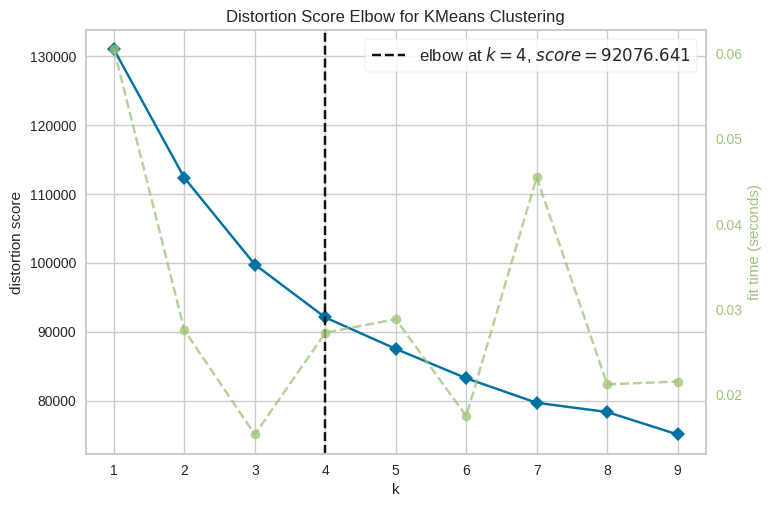

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))  # Especificamos el rango de 1 a 10 clústeres
visualizer.fit(df_scaled)  # Usamos los datos escalados
visualizer.poof()  # Muestra el gráfico del codo
plt.show()

El número óptimo de clústeres, según el gráfico del codo, es 4.


# **Reducción de Dimensionalidad con PCA**
Aplicamos PCA (Análisis de Componentes Principales) para reducir las dimensiones de los datos y visualizar los clústeres en un espacio 2D.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

# **Selección de Modelos para el Análisis de Clustering**
En este análisis de clustering, se utilizaron diversos modelos de aprendizaje no supervisado para segmentar los datos y observar diferentes patrones de agrupación. Los dos modelos iniciales seleccionados fueron:

- **KMeans:**
Elegí KMeans debido a su eficiencia y capacidad para identificar clústeres bien definidos cuando se conoce el número aproximado de grupos. Para determinar el número óptimo de clústeres, utilicé el método del codo, lo cual permitió cumplir los objetivos del análisis al identificar el número de clústeres más representativo.

- **DBSCAN:**
Opté por DBSCAN (Density-Based Spatial Clustering of Applications with Noise) ya que este algoritmo no requiere la especificación de un número fijo de clústeres, lo cual es una ventaja al trabajar con datos más ruidosos. Ajusté los parámetros eps (radio de vecindad) y min_samples (número mínimo de puntos para formar un clúster) para optimizar la detección de grupos densos y manejar mejor los outliers.

# **Aplicación de KMeans para Clustering**
Aplicamos el algoritmo KMeans con 4 clústeres, que es el número óptimo determinado previamente, y visualizamos los resultados.

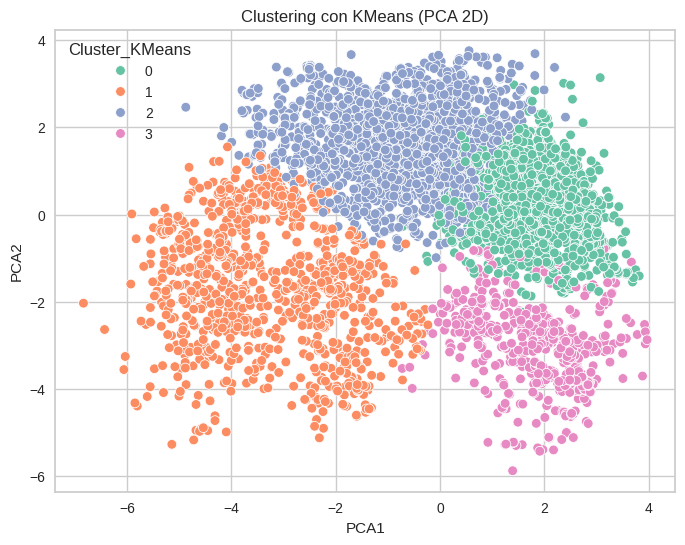

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_pca['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Visualización de Clustering con KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='Set2')
plt.title('Clustering con KMeans (PCA 2D)')
plt.show()

El siguiente gráfico muestra cómo KMeans segmenta los datos en 4 clústeres. Cada punto representa una observación en el espacio reducido por PCA, y los diferentes colores corresponden a los clústeres asignados por el modelo.

# **Determinación del valor óptimo de eps para DBSCAN mediante el gráfico k-dist**

Este análisis utiliza el gráfico k-dist para identificar el punto de "codo", que permite determinar el valor óptimo de eps en el algoritmo DBSCAN. El gráfico muestra la distancia al k-ésimo vecino más cercano de cada punto en un conjunto de datos escalado, ayudando a seleccionar el parámetro que define el tamaño del vecindario para el agrupamiento.

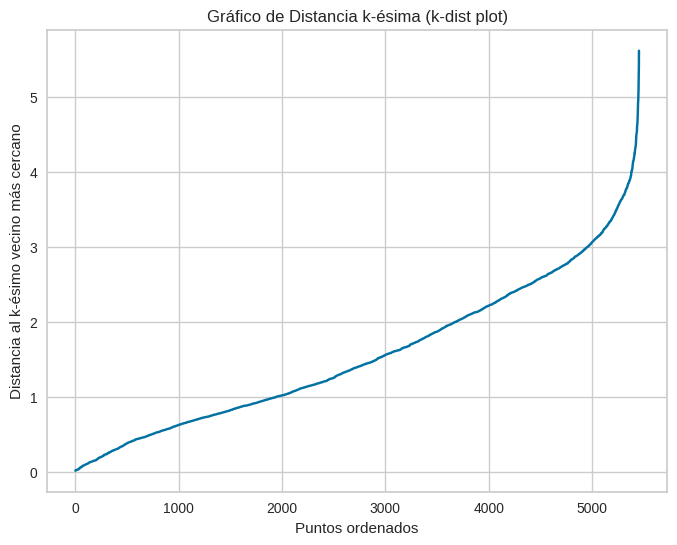

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Definir el número mínimo de muestras para el vecindario
min_samples = 5

# Calcular las distancias a los vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(df_scaled)  # df_scaled es el conjunto de datos escalado
distances, indices = neighbors.kneighbors(df_scaled)

# Ordenar las distancias y seleccionar la distancia al k-ésimo vecino más cercano
distances = np.sort(distances[:, -1])

# Graficar el k-dist plot
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al k-ésimo vecino más cercano')
plt.title('Gráfico de Distancia k-ésima (k-dist plot)')
plt.grid(True)
plt.show()

# **Aplicación de DBSCAN para Clustering**
Por último, aplicamos el algoritmo DBSCAN para clustering utilizando el valor de eps aproximado de 2.6, obtenido a partir del gráfico k-dist. Este valor se selecciona al identificar el punto de "codo" en el gráfico, lo que nos ayuda a definir el tamaño del vecindario para el algoritmo. Los resultados del clustering se visualizan en un gráfico 2D

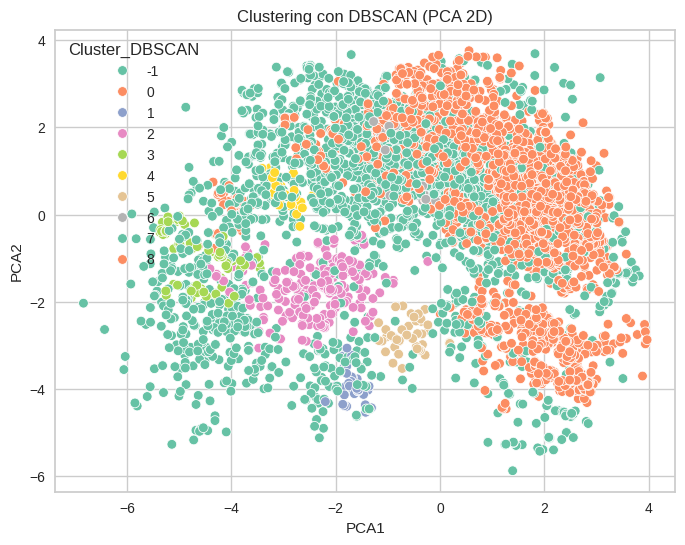

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2.6, min_samples=33)
df_pca['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Visualización de Clustering con DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster_DBSCAN', palette='Set2')
plt.title('Clustering con DBSCAN (PCA 2D)')
plt.show()

El gráfico resultante muestra cómo DBSCAN segmentó los datos en función de la densidad de los puntos. Los puntos en verde representan outliers, mientras que los puntos de colores corresponden a los grupos identificados por el modelo.

# **Conclusiones sobre el Análisis de Clustering**
KMeans demostró ser eficaz para segmentar los datos en grupos claros y bien definidos, pero su rendimiento depende críticamente de la elección del número de clústeres. El análisis del codo fue fundamental para determinar que 4 clústeres eran los más representativos en este caso.

DBSCAN, por otro lado, mostró su fortaleza al manejar los outliers y no necesitar la especificación del número de clústeres. Sin embargo, el rendimiento de este modelo es muy sensible a los parámetros eps y min_samples, y pequeñas variaciones en estos valores pueden alterar significativamente los resultados de la segmentación.

________
________________


# **Exploración de Modelos Adicionales para Comparar con KMeans y DBSCAN**
Para enriquecer el análisis, decidí probar dos modelos adicionales que podrían ofrecer una segmentación distinta y compararlos con los resultados obtenidos por KMeans y DBSCAN.

# **Clustering Jerárquico (Agglomerative Clustering)**
El Clustering Jerárquico aglomera puntos individualmente en grupos y luego fusiona esos grupos de manera iterativa según la proximidad entre ellos. Este método no requiere especificar el número de clústeres inicialmente, lo que lo convierte en una opción interesante para explorar las relaciones jerárquicas en los datos.

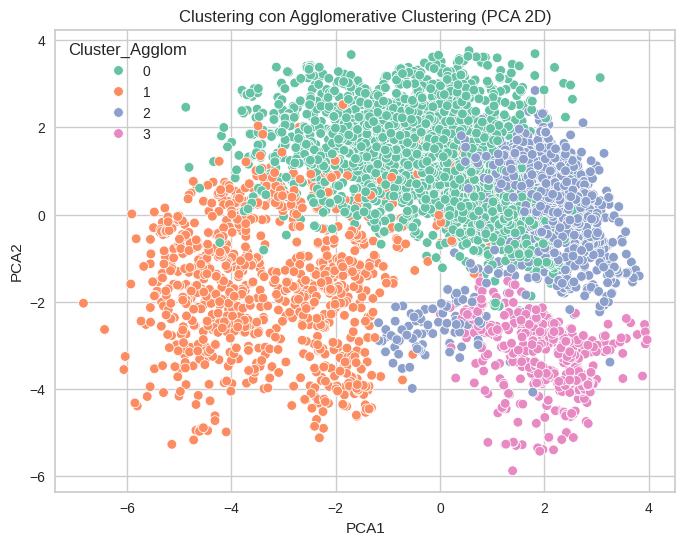

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Crear modelo con 4 clústeres
agglom = AgglomerativeClustering(n_clusters=4)
df_pca['Cluster_Agglom'] = agglom.fit_predict(df_scaled)

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster_Agglom', palette='Set2')
plt.title('Clustering con Agglomerative Clustering (PCA 2D)')
plt.show()

Visualización de Clustering con Agglomerative Clustering
La visualización en el siguiente gráfico muestra cómo el Clustering Jerárquico agrupa los datos en función de la distancia entre puntos, con cada color representando un clúster diferente.

# **Spectral Clustering**
Spectral Clustering utiliza los eigenvectores de una matriz de similitud para realizar la reducción de dimensiones y luego aplicar el clustering. Este modelo es ideal para datos que no siguen una distribución lineal o cuando los clústeres tienen formas complejas.

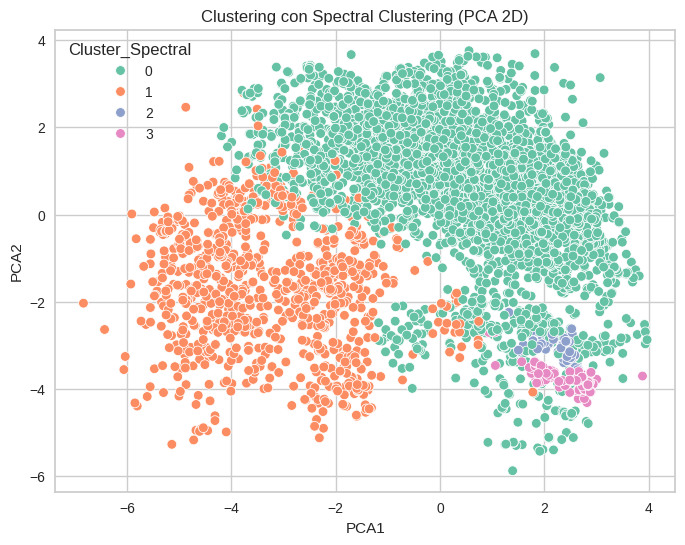

In [ ]:
from sklearn.cluster import SpectralClustering
# Aplicar Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
df_pca['Cluster_Spectral'] = spectral.fit_predict(df_scaled)

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster_Spectral', palette='Set2')
plt.title('Clustering con Spectral Clustering (PCA 2D)')
plt.show()

El gráfico a continuación muestra cómo Spectral Clustering segmenta los datos utilizando una aproximación basada en la similitud de los puntos. El modelo es más flexible con la forma de los clústeres.

## **Conclusiones Finales**
Tras evaluar los modelos **KMeans, DBSCAN, Agglomerative Clustering y Spectral Clustering**, se observan las siguientes conclusiones:

- **KMeans** sigue siendo el modelo más efectivo para identificar grupos bien definidos, pero la selección del número de clústeres es crucial para obtener buenos resultados.

- **DBSCAN** es una excelente opción cuando los datos contienen outliers o presentan formas irregulares, aunque su sensibilidad a los parámetros de eps y min_samples puede hacer que los resultados varíen considerablemente.

Los modelos **Agglomerative Clustering y Spectral Clustering** ofrecen segmentaciones más flexibles y muestran resultados más acordes a la estructura de los datos. En particular, Agglomerative Clustering se asemeja más a los resultados de KMeans, mientras que Spectral Clustering es útil cuando se trabaja con datos no lineales o con clústeres de formas complejas.

**Experiencia con los Parámetros del Modelo DBSCAN**

Al trabajar con DBSCAN, me encontré con el desafío de ajustar adecuadamente los parámetros eps y min_samples, que son fundamentales para la definición de los clústeres. Este modelo es altamente sensible a estos valores, y al experimentar con diferentes configuraciones, pude observar cómo los resultados variaban significativamente. Esta experiencia me permitió comprender mejor el impacto de estos parámetros en la segmentación de los datos. Identificar estas dificultades ha sido valioso, ya que me ayuda a enfocar mi investigación en áreas clave para mejorar y optimizar mis enfoques, lo que contribuye a lograr mejores resultados y fortalecer mi desarrollo profesional.

# **Recursos Utilizados**

**Librerías:**

**sklearn:** Para implementar modelos de clustering como KMeans, DBSCAN, Agglomerative Clustering y Spectral Clustering.

**Yellowbrick:** Para generar el gráfico del codo y determinar el número óptimo de clústeres usando KElbowVisualizer.

**matplotlib y seaborn:** Para la visualización de resultados.

**pandas y numpy:** Para la manipulación de datos y operaciones matemáticas.

**Clases de Aprendizaje Automático**: Ejemplos prácticos y material de la  clase.

**Modelos de Clustering:**
KMeans
DBSCAN
Agglomerative Clustering
Spectral Clustering

### **Prompts Utilizados:**
**Para KMeans y el gráfico del codo:**

**Prompt:**
- "Estoy buscando una forma visual de determinar el número óptimo de clústeres para un modelo de KMeans. ¿Hay alguna herramienta que me ayude a calcular la distorsión para varios valores de K y mostrar un gráfico del codo automáticamente?"

**Para DBSCAN y ajuste de parámetros:**

**Prompt:**
- **Prompt:** "¿Cómo defino los parámetros eps y min_samples para el algoritmo DBSCAN?"

**Para Spectral y Agglomerative Clustering:**

- **Prompt:** "Estoy trabajando con KMeans y DBSCAN para clustering. ¿Qué otros modelos de clustering recomiendas y cómo se aplican en Python?"



video Youtube: [Python Clase 23 - Clustering DBSCAN](https://www.youtube.com/watch?v=KzkhQ5iEXLQ)